# DATA512 A4: FInal Project Report

# Title: Effects of Online Gaming on Mental Health

Author: Aniruddha Dutta

### Motivation
The popularity for online competetive gaming is increasing exponentially. Billions of people worldwide get together to play online games and some of theme have even made a career out of playing games called 'pro-players'. The rise of gaming industry has opened up new career options such as professional players, viddeo-game streamers, game casters and many more. It has given birth to a fascinating online social community and gaming culture. But there are some major problems that the gaming community is facing, one of them is the issue of toxic behaviour. Players competing with eachother in online games often use profane and toxic language in the heat-of-the-moment or as strategy or simply to vent their frustration. Communication channels might be abused to harass and verbally assault other players, which negates the very purpose of entertainment in games by creating a toxic player-community. As a gaming enthusiast myself, I wish to analyze the toxic behaviour in online gaming and how it affects mental health of players.

### Project Objective

My primary objective of this project is to understand the effects of gaming on mental heath of gamers by answering the following research questions
##### Research Questions
1. Does online gaming affects the daily work-life of a person?
2. Are the effects on mental health more prominent for one particular gender?
3. Are younger people more prone to meantal health issues?


### Data

###### Online Gaming Anxiety Data:
This dataset consists of data collected as a part of a survey among gamers worldwide. The questionnaire asked questions that psychologists generally ask people who are prone to anxiety, social phobia, and less to no life satisfaction. The questionnaire consists of several set of questions as asked as a part of psychological study. The original data was collated by <b>Marian Sauter</b> and <b>Dejan Draschkow</b>.
It is publically availaible and can be downloaded from [OSFHome](https://osf.io/ru5kc/?view_only=4c54da075e164ea2a5329f5669d03c41![image.png](attachment:image.png)).\

<b>Column Definitions</b>\
The data consists of 55 columns that correspond to every question asked in the survey questionnaire. Most of the columns correspond to different scoring criteria used in psychology like GAD (General Anxiety Disorder), SWL (Satisfaction with Life) an and SPIN (Social Phobia Inventory) scores. There are a few generic questions about where the people are born and why do they lay online games etc.

- <b>GAD_T:</b> Total General Anxiety Disorder score; 0-5 no anxiety, 5-10 mild, 10-15 moderate and >15 severe
- <b>SWL_T:</b> Satisfaction with Life score; measure of well being excluding health and employement life domains
- <b>SPIN_T:</b> Social Phobia Indicator; <20 none, 21-30 mild, 31-40 moderate, 41-50 severe, >50 very severe 
- <b>Hours:</b> Total number of hours devoted to gaming in a week


### Related Work
My inpiration for this project comes from the article by Ayuub Mustofa which talks about the toxicity in online gaming community. The article can be found [here](https://hybrid.co.id/post/toxic-behavior-in-online-gaming-is-it-necessary). It talks about how toxic behaviour of players can also be by choice based on the context of the game along with its impacts on the gaming community. 

Some related research:
1. [The Association Between Video Gaming and Psychological Functioning](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6676913/), by Juliane M. von der Heiden, Beate Braun, Kai W. Müller and Boris Egloff, published online 2019 Jul 26.

##### Import packages

In [13]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from statsmodels.formula.api import rlm
from tqdm import tqdm
from wordcloud import WordCloud

###### Loading Data

In [2]:
gaming_study = pd.read_csv("D:/MSDS_UW/HCDS/project/GamingStudy_data_v2.csv")
gaming_study.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,highestleague,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15,I play for fun,having fun,NaN,NaN,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,Somewhat difficult,Other,PC,8,I play for fun,having fun,NaN,NaN,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,Not difficult at all,Other,PC,0,I play for fun,having fun,NaN,NaN,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,Not difficult at all,Other,PC,20,I play for fun,improving,NaN,NaN,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20,I play for fun,having fun,NaN,NaN,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


looking at the summary of the data to get an overview of the availaible features using <b>describe()</b> function from the pandas library

In [3]:
gaming_study.describe()

,S. No.,Timestamp,Hours,highestleague,streams,Narcissism,Age,GAD_T,SWL_T,SPIN_T
count,13434.000000,13434.000000,13434.000000,0.0,13344.000000,13411.000000,13434.000000,13434.000000,13434.000000,12786.000000
mean,7096.038261,42054.841287,22.247357,NaN,11.241682,2.027216,20.931889,5.204779,19.799911,19.835836
std,4114.510558,0.272527,70.284502,NaN,78.607445,1.061040,3.301571,4.707207,7.224202,13.460603
min,1.000000,42052.004370,0.000000,NaN,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000
25%,3532.250000,42054.716542,12.000000,NaN,4.000000,1.000000,18.000000,2.000000,14.000000,9.000000
50%,7086.500000,42054.800650,20.000000,NaN,8.000000,2.000000,20.000000,4.000000,20.000000,17.000000
75%,10655.750000,42054.932180,28.000000,NaN,15.000000,3.000000,22.000000,8.000000,26.000000,28.000000
max,14250.000000,42058.363750,8000.000000,NaN,9001.000000,5.000000,63.000000,21.000000,35.000000,68.000000


###### Data Processing

From the data summary above, we knwo that <b>Hours</b> column has outliers with value '8000', because the mean is only at '22.24'. So we will count the number of rows that have 'Hours' = 8000 and treat them accordingly.

In [6]:
gaming_study[gaming_study.Hours == 8000].shape

(1, 26)

As we only have one datapoint with hours == 8000, we can exclude it from the analyses

In [10]:
gaming_study_clean = gaming_study[gaming_study.Hours != 8000] 
len(gaming_study_clean['S. No.'])

13433

Creating calculated feidls for the analyses:\

- <b>Age_Trier:</b> I will bucket the existing 'Age' column values into 5 buckets, starting from '<=25', '25-35' and so on till '>55'. 

- <b>Hours_group:</b> Categorize gaming hours per week into 6 buckets. 

In [11]:
#1. create age bucket
conditions1 = [
    (gaming_study_clean['Age'] <=25),
    (gaming_study_clean['Age'] > 25) & (gaming_study_clean['Age'] <= 35),
    (gaming_study_clean['Age'] > 35) & (gaming_study_clean['Age'] <= 45),
    (gaming_study_clean['Age'] > 45) & (gaming_study_clean['Age'] <= 55),
    (gaming_study_clean['Age'] > 55)
    ]

values = ['<=25', '25-35', '35-45', '45-55', '>55']

gaming_study_clean['Age_tier'] = np.select(conditions1, values)


#2. Create time bucket
conditions2 = [
    (gaming_study_clean['Hours'] <=10),
    (gaming_study_clean['Hours'] > 10) & (gaming_study_clean['Hours'] <= 30),
    (gaming_study_clean['Hours'] > 30) & (gaming_study_clean['Hours'] <= 50),
    (gaming_study_clean['Hours'] > 50) & (gaming_study_clean['Hours'] <= 70),
    (gaming_study_clean['Hours'] > 70) & (gaming_study_clean['Hours'] <= 90),
    (gaming_study_clean['Hours'] > 90)
    ]

values = ['<=10', '10-30', '30-50', '50-70', '70-90','>90']

gaming_study_clean['Hours_group'] = np.select(conditions2, values)

C:\Users\Frost\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Frost\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Exploratory Analysis

In this section I will perform EDA on the processed gaming_study data to answer the three stated research questions

Lets start by understanding 'WHY' gamers invest such large amount of time per week playing online games

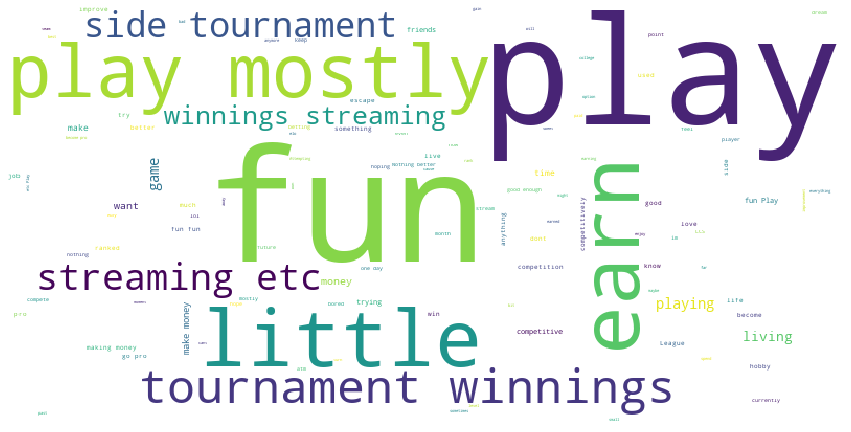

In [16]:
wordcloud2 = WordCloud(background_color='white',width=800, height=400).generate(' '.join(gaming_study_clean['earnings']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Majority of people play to have fun while some focus on winning tournaments and earning money from it.  But is it worth to devote tens of hours on casual gaming (for fun) if it can cause mental health probelms? 

In the next section I plot some distributions of the mental health related features present in the data to get a general overview of the mental health status of the gamers.


C:\Users\Frost\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Frost\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


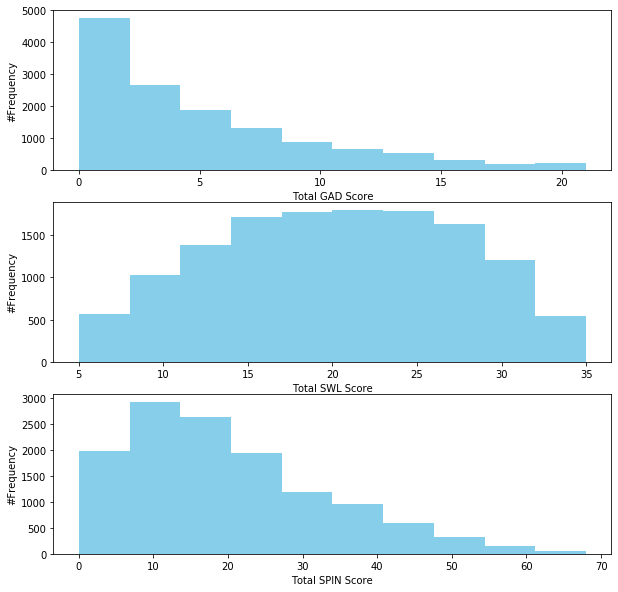

In [18]:

fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10, 10))
ax1.hist(gaming_study_clean['GAD_T'], color = "skyblue")
ax1.set(ylabel = "#Frequency", xlabel = 'Total GAD Score')

ax2.hist(gaming_study_clean['SWL_T'], color = "skyblue")
ax2.set(ylabel = "#Frequency", xlabel = 'Total SWL Score')


ax3.hist(gaming_study_clean['SPIN_T'], color = "skyblue")
ax3.set(ylabel = "#Frequency", xlabel = 'Total SPIN Score')


plt.show()

This gves an overview of the mental health status of gamers. 
Majority of the gamers dont show severe signs of anxiety disorder or social phobia  but this is not enough to draw a conclusion as we need to consider in other factors. 

Let us look at how gaming affects the daily-lives of gamers. For this we will use the <b>'GADE'</b> column in the data. This is a categorical feild with values ranging from 'Not Difficult at all' to 'Extremely Difficult'. This columns represents how difficult gamers find managing their work-life and daily routines because of gaming.

First we will look at 'GADE' vs 'Gender' and then we will look at 'GADE' vs 'Work'(employement status)

C:\Users\Frost\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Frost\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Frost\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


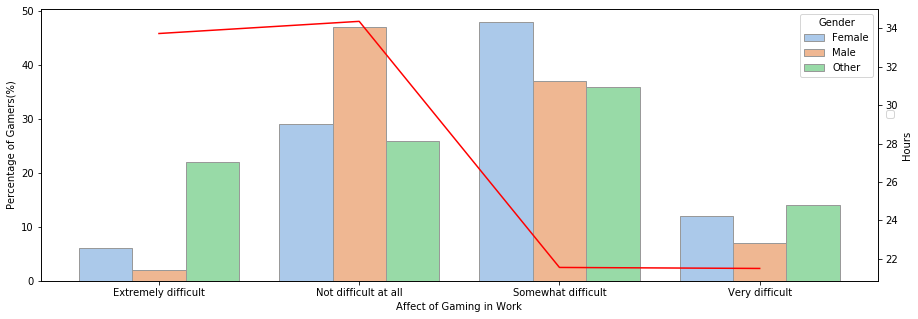

In [20]:
#This will be used to calculate percentage of gamers by gender 
male_gamers = len(gaming_study_clean[gaming_study_clean.Gender == 'Male'])
fem_gamers = len(gaming_study_clean[gaming_study_clean.Gender == 'Female'])
others = len(gaming_study_clean[gaming_study_clean.Gender == 'Other'])


GADE_df = gaming_study_clean.groupby(['GADE', 'Gender'], as_index = False).agg({'S. No.':'count', 'Hours':'mean'})
GADE_df['prcnt'] = 0

 
#Calcuating percentage of gamers by gender
for i in range(0,len(GADE_df['GADE'])):
        if GADE_df['Gender'][i] == 'Male':
            GADE_df['prcnt'][i] = float((GADE_df['S. No.'][i]/male_gamers)*100)
        elif GADE_df['Gender'][i] == 'Female':
            GADE_df['prcnt'][i] = float((GADE_df['S. No.'][i]/fem_gamers)*100)
        else:
            GADE_df['prcnt'][i] = float((GADE_df['S. No.'][i]/others)*100)
        


plt.figure(figsize=(15,5))
ax = sns.barplot(y="prcnt", hue="Gender", x="GADE",
            palette="pastel", edgecolor=".6",
            data=GADE_df)

ax.set(ylabel = "Percentage of Gamers(%)", xlabel = 'Affect of Gaming in Work')

ax2 = ax.twinx()
ax2 = sns.lineplot(y="Hours", x = "GADE", color = "red",ci = None,
            data=GADE_df)


plt.legend(bbox_to_anchor=(1.01, 0.63), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


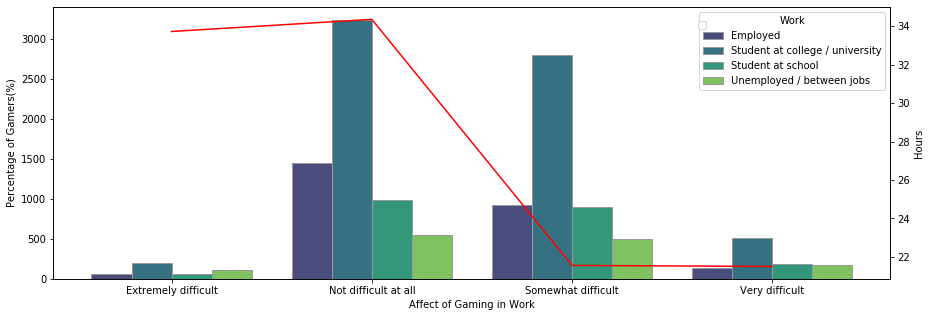

In [21]:

df = gaming_study_clean.groupby(['GADE', 'Work'], as_index = False).agg({'S. No.':'count', 'Hours':'mean'})
df['prcnt'] = 0


plt.figure(figsize=(15,5))
ax = sns.barplot(y='S. No.', hue="Work", x="GADE",
            palette="viridis", edgecolor=".6",
            data=df)

ax.set(ylabel = "Percentage of Gamers(%)", xlabel = 'Affect of Gaming in Work')

ax2 = ax.twinx()
ax2 = sns.lineplot(y="Hours", x = "GADE", color = "red",ci = None,
            data=GADE_df)

plt.legend(bbox_to_anchor=(0.77, 0.95), loc=2, borderaxespad=0.)

<b>Findings</b>
- Work/Job of gamers doesnt seem to affected by their participation in online gaming
- Majority of the gamers find it ‘somewhat difficult’ to ‘Not difficult at all’ managing their work along with gaming
- 48% of females find it ‘somewhat difficult’ whereas 47% of males identify as ‘Not difficult at all’


Majority of the population irrespective of their employement status dont find it very difficult. Slight indication that females find it more difficult to manage work with gaming compared to males. Also interesting to note that people with maximum hours spend on gaming either identify as not difficult or extremely difficult 


Next we will try to answer how number of hours devoted to gaming per week affects mental health. 



[Text(0, 0.5, 'SWL Score'), Text(0.5, 0, 'Hours Bucket')]

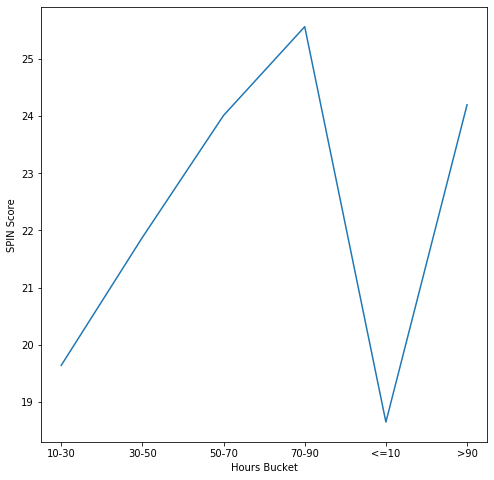

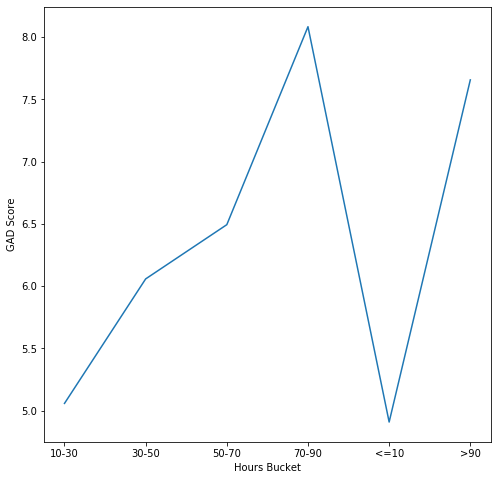

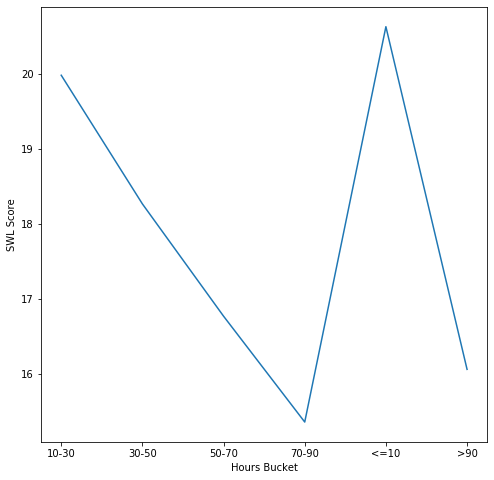

In [24]:

df = gaming_study_clean[gaming_study_clean.Hours <400]
df = df.sort_values(by = ['SWL_T'])


plt.subplots(1,figsize=(8, 8), squeeze = False)
ax1 = sns.lineplot(y="SPIN_T", x = "Hours_group", ci = None,
            data=df)
ax1.set(ylabel = "SPIN Score", xlabel = 'Hours Bucket')

plt.subplots(1,figsize=(8, 8), squeeze = False)
ax2 = sns.lineplot(y="GAD_T", x = "Hours_group", ci = None,
            data=df)
ax2.set(ylabel = "GAD Score", xlabel = 'Hours Bucket')

plt.subplots(1,figsize=(8, 8), squeeze = False)
ax3 = sns.lineplot(y="SWL_T", x = "Hours_group", ci = None,
            data=df)
ax3.set(ylabel = "SWL Score", xlabel = 'Hours Bucket')



<b>Findings:</b>
- On average, Players who devote >50 hours to gaming exhibit higher Anxiety Disorder and Social Phobia
- Life satisfaction scores also drop with rise in gaming hours
- The trend slightly shifts for people 90+ hours in online games per week

People who spend '50-70' hours on games per week, tend to have a higher GAD and SPIN score. This shows that gaming for more than 50 hours per week affects mental health by inducing anxiety disorders and social phobia, and there affects might get severe if gamers continue to invest such long hours. This is primarily for those who are playing only as a hobby or to have fun. People who play professionally dont show signs of mental health issues even when playing for 90+ hours per week, explained by the dip in the trend in the plots above.


In this section we will analyse the effects of gaming on mental health og gamers of different genders to identify if one people of a gender are more prone to get affected than others. 

Lets start by seeing the distribution of gamers of each gender across 'Age_tier'

[Text(0, 0.5, 'Percentage of Gamers (%)'), Text(0.5, 0, 'Age Group')]

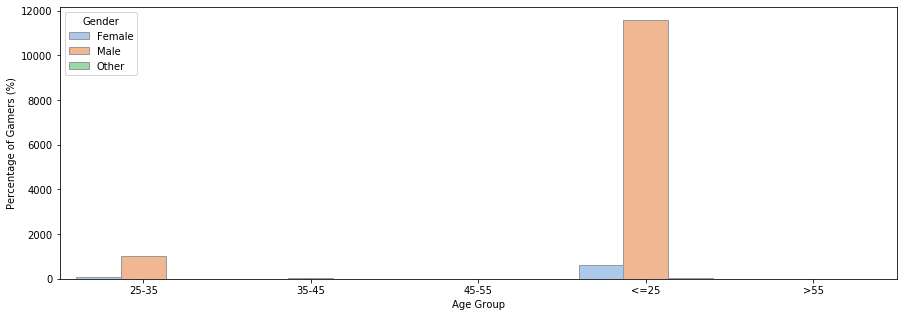

In [26]:
df = gaming_study_clean.groupby(['Age_tier', 'Gender'], as_index = False).agg({'S. No.':'count'})


plt.figure(figsize=(15,5))
ax = sns.barplot(y='S. No.', x="Age_tier",hue = 'Gender', palette="pastel", edgecolor=".6",
            data=df)
ax.set(ylabel = "Percentage of Gamers (%)", xlabel = 'Age Group')

The gaming community is heavily male dominated, with majority of the population aged below 35 years. SO for the next analyses, we can safely excude age groups above 45 years. 

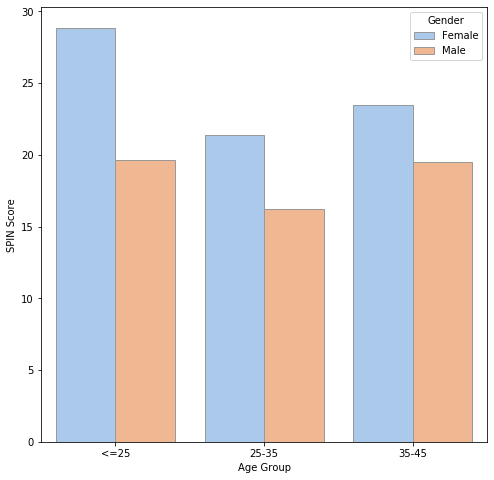

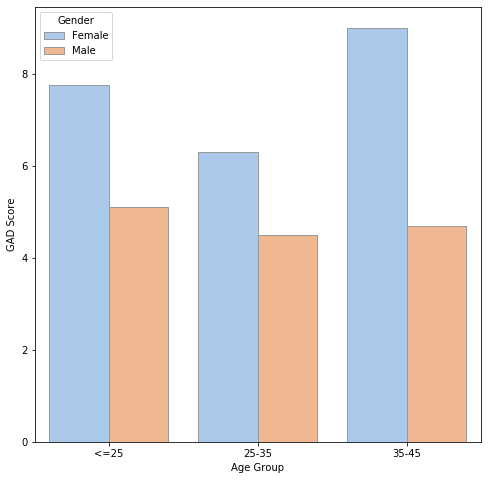

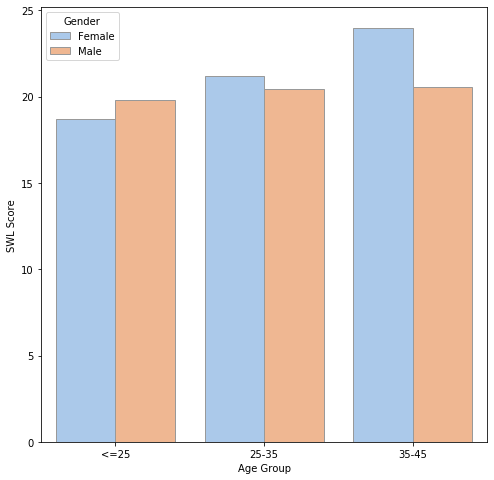

In [27]:
dfg = gaming_study_clean[gaming_study_clean.Gender != 'Other']
dfage = dfg.groupby(['Age_tier','Gender'], as_index = False).agg({'Hours':'mean',
                                                               'GAD_T':'mean', 'SWL_T':'mean', 'SPIN_T':'mean'})

dfage = dfage.sort_values(by = ['SWL_T'])

#excluding ages above 45 years
dfage = dfage[dfage.Age_tier != ">55"]
dfage = dfage[dfage.Age_tier != "45-55"]


#plot
plt.subplots(1,figsize=(8, 8), squeeze = False)
ax1 = sns.barplot(y="SPIN_T", x = "Age_tier", ci = None,hue = 'Gender', palette="pastel", edgecolor=".6",
            data=dfage)
ax1.set(ylabel = "SPIN Score", xlabel = 'Age Group')

plt.subplots(1,figsize=(8, 8), squeeze = False)
ax2 = sns.barplot(y="GAD_T", x = "Age_tier", ci = None,hue = 'Gender', palette="pastel", edgecolor=".6",
            data=dfage)
ax2.set(ylabel = "GAD Score", xlabel = 'Age Group')

plt.subplots(1,figsize=(8, 8), squeeze = False)
ax3 = sns.barplot(y="SWL_T", x = "Age_tier", ci = None,hue = 'Gender', palette="pastel", edgecolor=".6",
            data=dfage)
ax3.set(ylabel = "SWL Score", xlabel = 'Age Group')


plt.show()

<b>Findings:</b>
- Females under 25 years of age are most affected by online gaming
- Females under 25 years of age experience more social phobia compared to other age groups
- General Anxiety Disorder is highest amongst females in the 35-45 age group

From these graphs we find that younger females represented by <=25 years age-tier are affected relatively more than males of the same age group. 

### Conclusion

Though majority of the gamers we have considered in this data do not exhibit severe mental health conditions, there are still clear signs of people getting affected. Some key findings from the analyses are as follows:

- Females under 25 years of age are most affected by online gaming as they exhibit relatively higher Anxiety Disorder and Social Phobia
- Majority of the gamers dont feel that gaming severely affects their work or daily lives
- Most proportion of Female gamers find it somewhat difficult to manage work-life because of gaming
- Playing for 50-90 hours per week might cause mild Social Phobia and Anxiety Disorders

This proves that online gaming does affect mental health, and even though the effects are mild they need to be addressed inorder to maintain a healthy gaming community. 

I also feel that in-game toxicity is a prime contributor to mental health problems in gamers and I would like to explore this feature for future work.


### Appendix

This section contains some initial plots I created while exploring the data features. I also tested significance of features using a OLS model.

[Text(0, 0.5, 'Percentage of Gamers (%)'), Text(0.5, 0, 'Employement')]

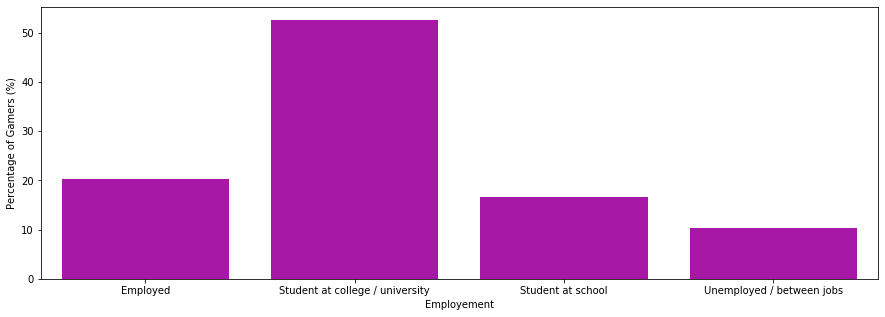

In [28]:
# Gamers distribution on empoyement status
df = gaming_study_clean.groupby(['Work'], as_index = False).agg({'S. No.':'count'})
df['prct'] = (df['S. No.']/len(gaming_study_clean['S. No.']))*100


plt.figure(figsize=(15,5))
ax = sns.barplot(y="prct", x="Work",color = 'm',
            data=df)
ax.set(ylabel = "Percentage of Gamers (%)", xlabel = 'Employement')

[Text(0, 0.5, 'Percentage of Gamers (%)'), Text(0.5, 0, 'Gender')]

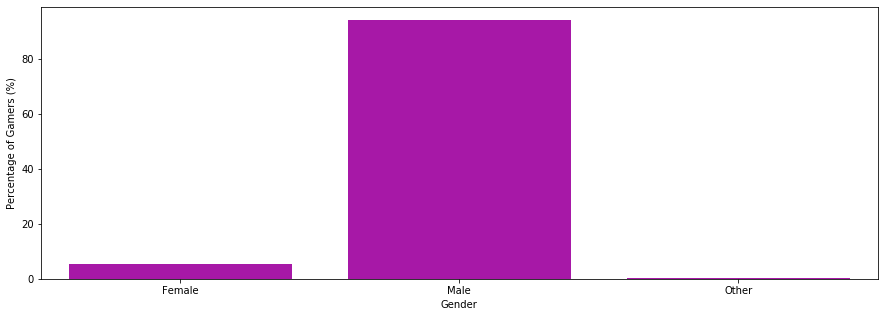

In [29]:
# gamers distribution by Gender
df = gaming_study_clean.groupby(['Gender'], as_index = False).agg({'S. No.':'count'})
df['prct'] = (df['S. No.']/len(gaming_study_clean['S. No.']))*100


plt.figure(figsize=(15,5))
ax = sns.barplot(y="prct", x="Gender",color = 'm',
            data=df)
ax.set(ylabel = "Percentage of Gamers (%)", xlabel = 'Gender')


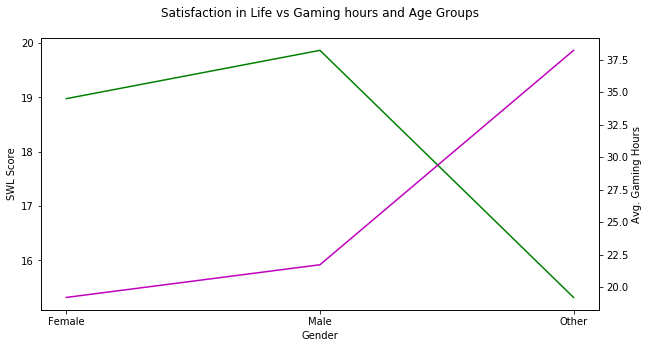

In [31]:
# SWL Score vs Gaming hours across Gender

df = gaming_study_clean.groupby(['Gender'], as_index = False).agg({'Hours':'mean',
                                                               'GAD_T':'mean', 'SWL_T':'mean', 'SPIN_T':'mean'})

plt.figure(figsize=(10,5))
ax1 = sns.lineplot(y="SWL_T", x = "Gender", color = "green",
            data=df)
ax2 = ax1.twinx()
ax2 = sns.lineplot(y="Hours", x = "Gender", color = "m",
            data=df)
ax1.set(ylabel = "SWL Score", xlabel = 'Gender')
ax2.set(ylabel = "Avg. Gaming Hours")
ax1.set_title("Satisfaction in Life vs Gaming hours and Age Groups\n")


plt.show()